In [2]:
"""

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.
The goal is to create a model that predicts the value of a target variable by learning simple decision rules 
inferred from the data features. The deeper the tree, the more complex the decision rules and the fitter the model.
 
1) 103pp --> two-moons data(그림2-23 = features : 연속형 / Y = 이범주형) in 103pp 자세히 보기 --> 두 분은 어떻게 나누고 싶나?

2) Decision Tree의 과정 : 105pp

3) Decision Tree의 용어 정리

Tree - Node(or leaf)
Purity(순수도) - impurity(불순도)
Root Node(뿌리 노드) - Pure Node(순수 노드)
Parent Node(부모 노드) - Child Node(자식 노드)

Gini index : 임의 노드 N에서 Y=1의 비율을 p, Y=0의 비율을 q라고 할 때(p+q=1), 노드의 불순도를 나타내는 지니지수는 G(N) = pq
Decision Tree(In CART)는 지니지수(G(N))을 최소로 줄일 때까지 노드를 생성시킨다. 
다시 말해 자녀 노드가 일정 값보다 작게 되는 경우 노드 분리를 하지 않는다.

종속 변수가 연속형(즉 Regression Problem)의 경우 불순도의 측도는 잔차제곱합(R^2)이다. 

4) Decision Tree 복잡도 제어 : 결정 나무의 학습 과정에서 훈련 데이터에 과대적합되는 특성이 나타남(105pp 그림 2-26)

4)-1 pre-pruning(사전 가지치기) : 나무의 최대 깊이 제한(max_depth) / 노드의 최대 개수 제한(max_leaf_nodes) / 데이터 포인트의 최소 개수 지정(min_samples_leaf)   
4)-2 Post-pruning(사후 가지치기) : 트리를 먼저 완성 시키고 완성된 순수 노드의 데이터 포인트 수에 따라 노드를 삭제 또는 병합

Scikit-learn은 사전 가지치기만 지원함을 명심

Decision Tree의 장단점 및 주요 매개변수 : 115pp


"""

from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import graphviz


mglearn.plots.plot_animal_tree() 


In [3]:
# load Wisconsin breast cancer data #

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target, stratify= cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

print("train score : {}".format(tree.score(X_train,y_train)))
print("test score : {}".format(tree.score(X_test,y_test)))

"""
train score = 1이 의미하는것? 

"""

train score : 1.0
test score : 0.9370629370629371


'\ntrain score = 1이 의미하는것? \n\n'

In [4]:
# Scikit-Learn이 과대적합을 방지하기 위해 pre-pruning만을 제공한다는 것을 명심 #

tree = DecisionTreeClassifier(max_depth=4, random_state=0) # 나무의 깊이를 4로 --> 질문을 4개로
tree.fit(X_train,y_train)

print("train score : {}".format(tree.score(X_train,y_train)))
print("test score : {}".format(tree.score(X_test,y_test)))

"""
test score : 0.9370629370629371(과대적합 상태) --> 0.951048951048951

"""

train score : 0.9882629107981221
test score : 0.951048951048951


'\ntest score : 0.9370629370629371(과대적합 상태) --> 0.951048951048951\n\n'

In [5]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=['malignity','positivity'],
                impurity = False, filled = True)

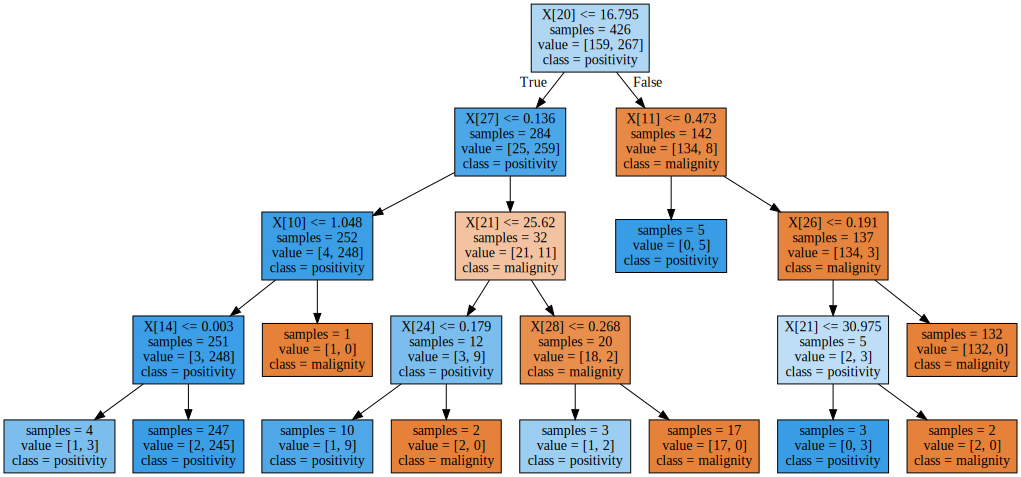

In [6]:
#graphviz #

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph)) 

In [8]:
# 트리의 특성 중요도(feature importance) #
# sum(feature importance) = 1 #


print("feature importance : {}".format(tree.feature_importances_))
print("feature importance : {}".format(np.sum(tree.feature_importances_ != 0)))

feature importance : [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]
feature importance : 9


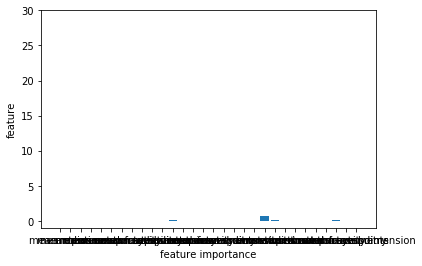

In [9]:
def plot_feature_importances_cancer2(model):
    n_features = cancer.data.shape[1]
    plt.bar(range(n_features),model.feature_importances_, align ='center')
    plt.xticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.ylim(-1,n_features)
plot_feature_importances_cancer2(tree)

# 왜 이런 그래프가 그려질까? # 

'\nworst radius가 가장 중요한 특성임을 시각적으로 알 수 있다 --> root node의 구분 변수가 worst radius인 이유\n--> Gini index에 따라 노드의 구분 변수의 순서가 결정된다.\n--> feature importance의 해석 : 110page\n\n'

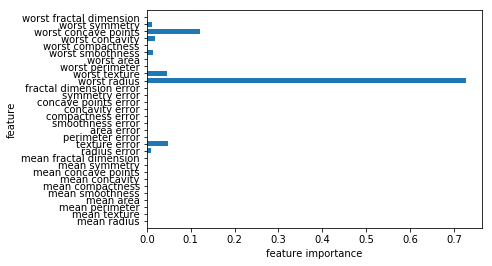

In [10]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_, align ='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.ylim(-1,n_features)
plot_feature_importances_cancer(tree)

"""
worst radius가 가장 중요한 특성임을 시각적으로 알 수 있다 --> root node의 구분 변수가 worst radius인 이유
--> Gini index에 따라 노드의 구분 변수의 순서가 결정된다.
--> feature importance의 해석 : 110page

"""

Feature importances: [0. 1.]


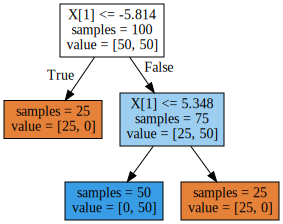

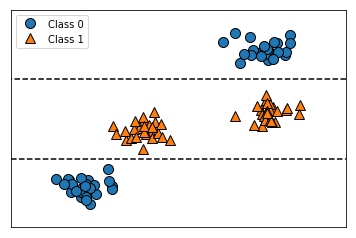

In [11]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# Feature importances: [0. 1.] --> 두 개의 예측 변수들 중 x[1]만 사용되었다. / 111~112pp에서 의미 찾기 #

Text(0,0.5,'price ($/Mbyte_)')

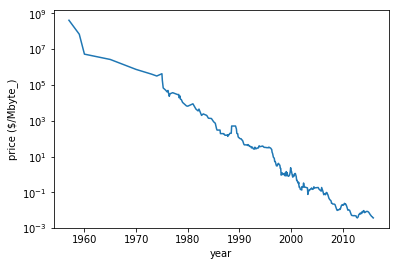

In [12]:
"""
DecisionTree를 활용한 Regression 

--> 트리 기반 모든 회귀 모델은 외삽(Extrapolation), 즉 훈련 데이터 범위 밖의 포인트에 대해 예측할 수 없다.

"""
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))

plt.semilogy(ram_prices.date,ram_prices.price) # plt.semilogy : Make a plot with log scaling on the y axis.
plt.xlabel("year")
plt.ylabel("price ($/Mbyte_)") # 램 1메가바이트당 가격 / log scale(original y) --> log graph 생각 #

In [13]:
ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
5,5,1973.00,3.993600e+05
6,6,1974.00,3.145730e+05
7,7,1975.00,4.218880e+05
8,8,1975.08,1.802240e+05
9,9,1975.25,6.758400e+04


In [14]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:,np.newaxis] # np.newaxis : 차원 하나를 인위적으로 증가시킬 때
y_train = np.log(data_train.price)

from sklearn.linear_model import LinearRegression
tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

X_all = ram_prices.date[:,np.newaxis] # 예측은 전체 기간 #

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 log scale을 되돌린다. #

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

print(price_tree)
print()
print(price_lr)

[4.11041792e+08 6.79477250e+07 5.24288000e+06 2.64241200e+06
 7.34003000e+05 3.99360000e+05 3.14573000e+05 4.21888000e+05
 1.80224000e+05 6.75840000e+04 4.99200000e+04 4.07040000e+04
 4.89600000e+04 2.30400000e+04 3.20000000e+04 3.68000000e+04
 2.80000000e+04 2.94400000e+04 1.92000000e+04 2.40000000e+04
 1.60000000e+04 1.52000000e+04 1.05280000e+04 6.70400000e+03
 6.48000000e+03 8.80000000e+03 4.47900000e+03 3.52000000e+03
 4.46400000e+03 1.98000000e+03 2.39600000e+03 1.98000000e+03
 1.37900000e+03 1.33100000e+03 8.80000000e+02 7.20000000e+02
 5.50000000e+02 4.20000000e+02 3.50000000e+02 3.00000000e+02
 3.00000000e+02 3.00000000e+02 3.00000000e+02 3.00000000e+02
 3.00000000e+02 3.00000000e+02 1.90000000e+02 1.90000000e+02
 1.90000000e+02 1.90000000e+02 1.90000000e+02 1.90000000e+02
 1.90000000e+02 1.76000000e+02 1.76000000e+02 1.57000000e+02
 1.54000000e+02 1.54000000e+02 1.54000000e+02 1.54000000e+02
 1.54000000e+02 1.63000000e+02 1.33000000e+02 1.63000000e+02
 1.63000000e+02 1.630000

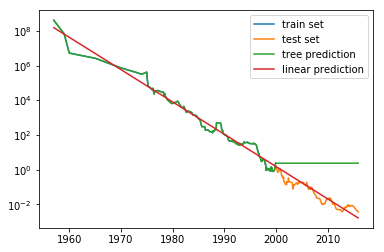

In [15]:
# Linear regression vs Decision Tree Regressor #
plt.semilogy(data_train.date,data_train.price, label = 'train set')
plt.semilogy(data_test.date,data_test.price, label = 'test set')
plt.semilogy(ram_prices.date,price_tree, label = 'tree prediction')

plt.semilogy(ram_prices.date,price_lr, label = 'linear prediction')
plt.legend() 

In [16]:
"""
Ensemble of Decision Tree consists of Random forest and Gradient Boosting

 Random forest

1) Random forest는 왜 만들어 졌나? --> Decision Tree의 과대적합을 방지하기 위하여 
2) Random forest의 전제 : 서로 구별되는(무작위성 주입) 각각의 결정 나무 모델은 예측이 잘 된다. 단 몇몇의 관측치가 과적합
3) Random forest는 어떻게 구성되어 있나 --> 조금씩 다른 여러 결정 트리의 묶음 --> 결과의 평균치를 최종결과로
4) 트리를 만드는 방법 : 데이터 포인트(관측치)를 무작위로 선택 / 분할 테스트에서 특성을 무작위로 선택하는 방법

4)-1 생성할 나무 개수를 정한다(n_estimators 매개변수)
4)-2 데이터의 Bootstrap sample 생성(무작위성 반영)[데이터 포인트(관측치)를 무작위로 선택 ] --> 각기 다른 특성 부분 집합(By Gini Index)
4)-3 몇개의 특성을 고를지는 max_feature 매개변수로 조정[분할 테스트에서 특성을 무작위로 선택하는 방법] --> 1 <= max_feature <= n_features
4)-4 If max_feature = 1 ? / If max_feature = n_features ?

5) 회귀 : average / 분류 : weak majority

"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

# generate make_moons for binary classification # 

X,y = make_moons(n_samples = 100, noise = 0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y, random_state = 42)
forest = RandomForestClassifier(n_estimators=5, random_state=2) # 만들 나무 개수 : 5
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

'\n개별적인 tree[i] vs random forest\n\n'

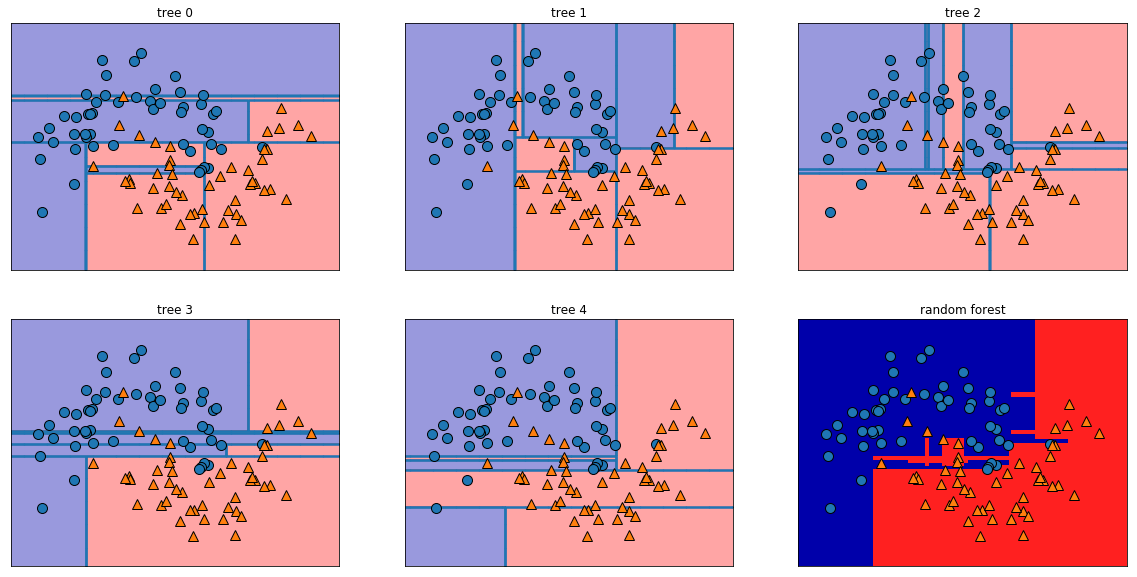

In [17]:
fig,axes = plt.subplots(2,3,figsize = (20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)): 
    # ravel : 다차원배열을 일차원으로 만들어 주는 함수
    # enumerate : 순서가 있는 자료형(리스트, 튜플, 문자열)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴한다.
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest,X,fill=True,ax=axes[-1,-1]) # axes[-1,1]의 의미
axes[-1,-1].set_title("random forest")
mglearn.discrete_scatter(X[:,0],X[:,1],y)

"""
개별적인 tree[i] vs random forest

"""

In [18]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
forest = RandomForestClassifier(n_estimators = 100, random_state=0)
forest.fit(X_train,y_train)

print("train accuracy : {}".format(forest.score(X_train,y_train)))
print("test accuracy : {}".format(forest.score(X_test,y_test)))  # vs 0.9370629370629371 in one tree model 

train accuracy : 1.0
test accuracy : 0.972027972027972


'\n앞의 그래프와 비교와 의미 추출 해보기 (pp 120)\n\n120~121pp 읽어 보기\n\n'

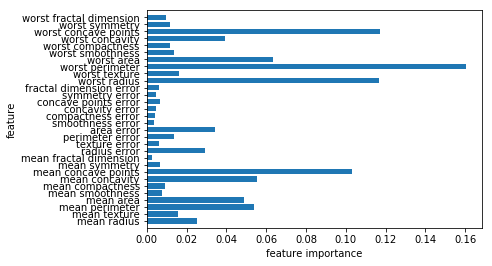

In [19]:
plot_feature_importances_cancer(forest) # plot_feature_importances_cancer는 앞에서 정의한 함수

"""
앞의 그래프와 비교와 의미 추출 해보기 (pp 120)

120~121pp 읽어 보기

"""

In [20]:
"""
Gradient Boosting Regression 

(1) 이름을 오해하지 말자 -> 분류와 회귀 둘다 쓰인다
(2) 이전 트리의 오차를 보완하는 순차적 방법 사용(무작위성 없음) -> 엄격한 pre-pruning[오차함수의 정의 -> 경사하강법(gradient Descent)]
(3) Gradient Descent를 사용하는 모든 알고리즘에 따라붙는 Learning_rate --> Learning_rate가 크면 보정의 강도가 세진다 -> 좀 더 복잡한 나무모델
(4) n_estimators가 커지면 모델의 복잡도가 증가

"""

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("train accuracy : {}".format(gbrt.score(X_train,y_train)))
print("test accuracy : {}".format(gbrt.score(X_test,y_test))) 

train accuracy : 1.0
test accuracy : 0.958041958041958


In [21]:
# 훈련 정확도가 100%이므로 과대적합 --> 트리의 최대 깊이를 줄이기 #

gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

print("train accuracy : {}".format(gbrt.score(X_train,y_train)))
print("test accuracy : {}".format(gbrt.score(X_test,y_test)))


train accuracy : 0.9906103286384976
test accuracy : 0.972027972027972


In [22]:
# 훈련 정확도가 100%이므로 과대적합 --> 학습률 낮추기 #

gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("train accuracy : {}".format(gbrt.score(X_train,y_train)))
print("test accuracy : {}".format(gbrt.score(X_test,y_test)))

train accuracy : 0.9882629107981221
test accuracy : 0.965034965034965


In [23]:
# 훈련 정확도가 100%이므로 과대적합 --> 학습률 낮추기 and max_depth 낮추기 #

gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01,max_depth=1)
gbrt.fit(X_train,y_train)

print("train accuracy : {}".format(gbrt.score(X_train,y_train)))
print("test accuracy : {}".format(gbrt.score(X_test,y_test))) 

train accuracy : 0.9272300469483568
test accuracy : 0.958041958041958


In [24]:
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=learning_rate,max_depth=max_depth)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

"""
gradient boosting vs randomforest --> 124pp

n_estimators ~ learning_rate ~ n_estimators --> 125pp

"""

NameError: name 'learning_rate' is not defined

In [25]:
# grid search #

train_accuracy = []
test_accuracy = []

for learning_rate in np.arange(0.1,0.9,0.01):
    for max_depth in np.arange(1,5,1):
        gbrt = GradientBoostingClassifier(random_state=0,learning_rate=learning_rate,max_depth=max_depth)
        gbrt.fit(X_train,y_train)
        
        train_accuracy.append(gbrt.score(X_train,y_train))
        test_accuracy.append(gbrt.score(X_test,y_test))
    


In [26]:
train_accuracy = pd.DataFrame({'index' : np.arange(1,len(train_accuracy)+1,1),'accuracy' : train_accuracy})
train_accuracy

,accuracy,index
0,0.990610,1
1,1.000000,2
2,1.000000,3
3,1.000000,4
4,0.990610,5
5,1.000000,6
6,1.000000,7
7,1.000000,8
8,0.990610,9
9,1.000000,10


In [27]:
test_accuracy = pd.DataFrame({'index' : np.arange(1,len(test_accuracy)+1,1),'accuracy' : test_accuracy})
test_accuracy

,accuracy,index
0,0.972028,1
1,0.972028,2
2,0.958042,3
3,0.958042,4
4,0.972028,5
5,0.965035,6
6,0.965035,7
7,0.965035,8
8,0.972028,9
9,0.979021,10


In [28]:
train_accuracy.to_csv("E:/train_acc.csv") 
test_accuracy.to_csv("E:/test_acc.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'E:/train_acc.csv'

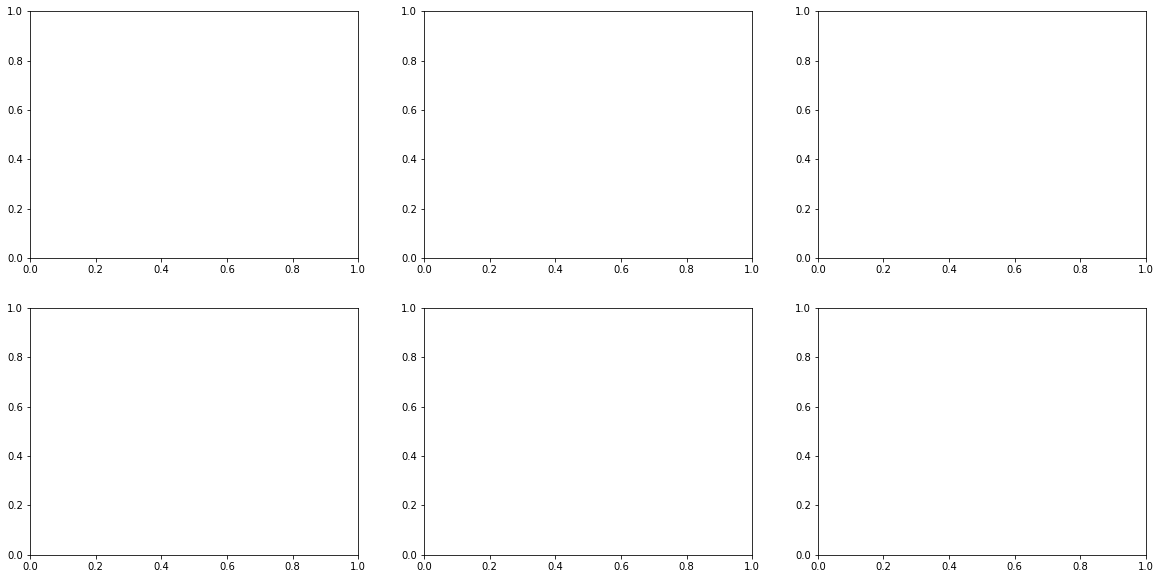

In [102]:
fig,axes = plt.subplots(2,3,figsize = (20,10))

In [103]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF208C5EB8>,
      dtype=object)

In [88]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')